https://youtu.be/qd74331SlAE

# COGS 108 - Final Project (Boomers and Fellow Kids)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

This project analyzes gathered information about anime genres and their popularity among different age generations. More specifically, we were interested in seeing if there exists a difference of trends within the Gen-Z viewer group and Millenial age group regarding the popularity of different anime genres. We utilized datasets obtaining attributes such as Anime titles, genres and user profiles to find out if being from a certain age group can predict what genre of anime one prefers.

# Names

- Claire Wu
- Felicity Villagomez
- Duy Pham
- Hy Huynh
- Andrew Vo

<a id='research_question'></a>
# Research Question

Do certain anime genres get different ratings from different age groups? Do Millennials prefer some genres over Gen Z-ers, and vice versa?

<a id='background'></a>

## Background & Prior Work

### Background information

When it comes to shows throughout the past years, the popularity of anime (Japanese animated cartoons) cannot be forgotten.  Combining not only art, but also cinematography and characterization, and other techniques, has led to anime’s increasing popularity, not just in the domestic market. It has been getting popular internationally, especially in Western audiences. In our study, we are seeing if age groups prefer a certain genre of anime.

### Previous research and data

Similar studies have been done before, as seen with these two links below. The first link includes data that a Japanese streaming site collected. Out of over fifty thousand votes, it listed the popular shows within the specific age groups as well as the number of votes it got. The votes are also collected with no age group filter. The second link shows more age groups and each one’s top five anime taken from the entertainment website anitrendz.net. The second one’s age groups are more tight than the first link’s age groups (3-4 years versus 10). While these two provided a lot of helpful information, their age group varied too much: we only wanted to look at two bigger age groups (namely Millennials vs Gen Z-ers), so they did not directly answer our research question.

### Importance - why is this interesting to us?

Anime's popularity over the last several years has been growing exponentially, and it doesn't look like it's stopping anytime soon. On the flip side, getting into anime can be a little intimidating - there are many shows and genres of all lengths and age groups. New and old anime watchers turn to websites to look for recommendations, which is where sites like MyAnimeList (and our data analysis) proves useful. These reviews (and other people's inputs in general) have a lot of power over those debating whether or not to watch an anime, even if we aren't aware of it. Sharing opinions with people is one of the ways popularity can grow and spread as well.
Understanding the relationship between age groups and liking a certain genre can help us explain why more shows are preferred over others.

References (include links):
- 1) https://www.reddit.com/r/anime/comments/7vwlus/the_most_popular_anime_among_different_age_group/ 
- 2) https://www.facebook.com/Anitrendz/posts/3023104781260355 

# Hypothesis


In our study, we hypothesize that there is a relationship between the genre of anime and whether or not it is more favored by millennials or Gen Z. We'll be looking at the various genres normally found on common animes. We predict that there will be a substantial difference and a clear distinction between the ratings for each genres according to the two age groups observed. We also predict that there will a strong preference toward certain genres for each age group and believe this is the case because data shows that older age groups prefer tamer and more realistic shows while younger age groups prefer dynamic and action-packed shows.

# Dataset(s)

- Dataset Name: Anime Dataset with Reviews - MyAnimeList
- Link to the dataset: https://www.kaggle.com/marlesson/myanimelist-dataset-animes-profiles-reviews
- Number of observations: 
  - 16214 unique anime titles where each anime title has its own unique uid corresponding to it. Each anime title also has 
    various genres which it belongs to which we will also be looking at.
  - 47885 user profiles, where each profile contains the user's information such as their username, gender, and year of birth       which we 
    need in order to observe and compare different age groups.
  - 130000 anime reviews by the various users, where each review contains the username of the user which did the review, as         well as the score that they gave that anime.

This dataset contained information that was crawled from https://myanimelist.net/ on 05/01/20. Within this dataset, there are 3 separate csv files:

- animes.csv contains list of anime, with title, title synonyms, genre, duration, rank, populatiry, score, airing date,
  episodes and many other important data about individual anime providing sufficient information about trends in time about
  important aspects of anime. Rank is in float format in csv, but it contains only integer value. This is due to NaN values and
  their representation in pandas.

- profiles.csv contains information about users who watch anime, namely username, birth date, gender, and favorite animes list.

- reviews.csv contains information about reviews users x animes, with text review and scores.



# Setup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#### Reading in the different datas from our datasets

In [2]:
df_anime_names= pd.read_csv('animes.csv')
df_profiles = pd.read_csv('profiles.csv')
df_reviews = pd.read_csv('reviews.csv')

# Data Cleaning

For the purpose of our analysis, we only want to focus on the data that can help answer our research question on wether or not there exists a relationship between age groups, specifially Gen-Z and millenials, and popularity of anime genres. Lets start by creating `df_anime_names` that includes information about the `title`, `genre`, and unique identifiers `uid` of different animes.

In [3]:
df_anime_names = df_anime_names[['title','uid','genre']]
df_anime_names

,title,uid,genre
0,Haikyuu!! Second Season,28891,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun..."
1,Shigatsu wa Kimi no Uso,23273,"['Drama', 'Music', 'Romance', 'School', 'Shoun..."
2,Made in Abyss,34599,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F..."
3,Fullmetal Alchemist: Brotherhood,5114,"['Action', 'Military', 'Adventure', 'Comedy', ..."
4,Kizumonogatari III: Reiketsu-hen,31758,"['Action', 'Mystery', 'Supernatural', 'Vampire']"
...,...,...,...
19306,Flip Flappers,32979,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']"
19307,Fushigi Yuugi,123,"['Adventure', 'Fantasy', 'Magic', 'Martial Art..."
19308,Gakkou no Kaidan,1281,"['Mystery', 'Horror', 'Supernatural']"
19309,InuYasha Movie 2: Kagami no Naka no Mugenjo,450,"['Action', 'Adventure', 'Comedy', 'Historical'..."


Each anime came with a string of genres; for example: the anime "Made in Abyss" had the genre string ['Sci-Fi', 'Adventure', 'Mystery', etc]. We split up each part of the string and added that anime into its respective genres using true/false - if that anime contained that genre or not. That way, if the anime had multiple genres, it would count in all its genres.



In [4]:
df_anime_names = df_anime_names[['title','uid','genre']]
df_anime_names['comedy'] = np.where(df_anime_names['genre'].str.find('Comedy') == -1, False, True)
df_anime_names['action'] = np.where(df_anime_names['genre'].str.find('Action') == -1, False, True)
df_anime_names['sports'] = np.where(df_anime_names['genre'].str.find('Sports') == -1, False, True)
df_anime_names['drama'] = np.where(df_anime_names['genre'].str.find('Drama') == -1, False, True)
df_anime_names['military'] = np.where(df_anime_names['genre'].str.find('Military') == -1, False, True)
df_anime_names['music'] = np.where(df_anime_names['genre'].str.find('Music') == -1, False, True)
df_anime_names['school'] = np.where(df_anime_names['genre'].str.find('School') == -1, False, True)
df_anime_names['shounen'] = np.where(df_anime_names['genre'].str.find('Shounen') == -1, False, True)
df_anime_names['romance'] = np.where(df_anime_names['genre'].str.find('Romance') == -1, False, True)
df_anime_names['sci_fi'] = np.where(df_anime_names['genre'].str.find('Sci-Fi') == -1, False, True)
df_anime_names['adventure'] = np.where(df_anime_names['genre'].str.find('Adventure') == -1, False, True)
df_anime_names['mystery'] = np.where(df_anime_names['genre'].str.find('Mystery') == -1, False, True)
df_anime_names['supernatural'] = np.where(df_anime_names['genre'].str.find('Supernatural') == -1, False, True)
df_anime_names['mecha'] = np.where(df_anime_names['genre'].str.find('Mecha') == -1, False, True)
df_anime_names['historical'] = np.where(df_anime_names['genre'].str.find('Historical') == -1, False, True)
df_anime_names['super_power'] = np.where(df_anime_names['genre'].str.find('Super Power') == -1, False, True)
df_anime_names['fantasy'] = np.where(df_anime_names['genre'].str.find('Fantasy') == -1, False, True)
df_anime_names['slice_of_life'] = np.where(df_anime_names['genre'].str.find('Slice of Life') == -1, False, True)
df_anime_names['shoujo'] = np.where(df_anime_names['genre'].str.find('Shoujo') == -1, False, True)
df_anime_names['horror'] = np.where(df_anime_names['genre'].str.find('Horror') == -1, False, True)
df_anime_names['harem'] = np.where(df_anime_names['genre'].str.find('Harem') == -1, False, True)

df_anime_names = df_anime_names.drop(columns = 'genre')
df_anime_names

,title,uid,comedy,action,sports,drama,military,music,school,shounen,...,mystery,supernatural,mecha,historical,super_power,fantasy,slice_of_life,shoujo,horror,harem
0,Haikyuu!! Second Season,28891,True,False,True,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,Shigatsu wa Kimi no Uso,23273,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Made in Abyss,34599,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,Fullmetal Alchemist: Brotherhood,5114,True,True,False,True,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,Kizumonogatari III: Reiketsu-hen,31758,False,True,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19306,Flip Flappers,32979,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19307,Fushigi Yuugi,123,True,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
19308,Gakkou no Kaidan,1281,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
19309,InuYasha Movie 2: Kagami no Naka no Mugenjo,450,True,True,False,True,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False


In order for us to know which group our data are from, we first went through the profile csv and found their birthday year in order to separate them into two categories: Millenial (1981-1996) and Gen-Z (1997-2012). Each profiles will be either a Millennials or Gen Z depend on their respective year of birth.

In [5]:
df_profiles = df_profiles[['profile','gender','birthday']]
df_profiles = df_profiles.dropna(how = 'any')
pd.set_option('mode.chained_assignment', None)
df_profiles['birthday'] = pd.to_datetime(df_profiles['birthday'], errors = 'coerce')
df_profiles['birthday'] = pd.DatetimeIndex(pd.to_datetime(df_profiles['birthday'])).year

In [6]:
df_profiles = df_profiles.dropna(how = 'any')
df_profiles = df_profiles.astype({'birthday': 'int32'})
df_profiles = df_profiles.drop(axis = 0, index = 32049)
df_profiles = df_profiles.drop(axis = 0, index = 7).reset_index()
df_profiles = df_profiles.drop(columns = 'index')
df_profiles['Age'] = df_profiles['birthday'].isin(range(1981,1996))
df_profiles['Age'] = df_profiles['Age'].replace(True, 'Millenials')
df_profiles['Age'] = df_profiles['Age'].replace(False, 'Gen_Z')
df_profiles

,profile,gender,birthday,Age
0,DesolatePsyche,Male,1994,Millenials
1,baekbeans,Female,2000,Gen_Z
2,aManOfCulture99,Male,1999,Gen_Z
3,jchang,Male,1992,Millenials
4,angelsreview,Female,1989,Millenials
...,...,...,...,...
37102,HajisSoul,Male,1992,Millenials
37103,samdineen20,Female,1992,Millenials
37104,anjel,Female,1988,Millenials
37105,lovelessxd,Female,1992,Millenials


For the anime reviews, we'll use only the data from columns that contains the user's profile name, the anime they reviewed, and that anime's corresponding score given by the user. Also, due to there being a lot of duplicates, we filtered the reviews so that each anime can only have 1 review from the same person.


In [7]:
df_reviews = df_reviews[['profile', 'anime_uid', 'score']]
df_reviews[df_reviews['score'] == 11]
df_reviews = df_reviews.replace(11, 10)
df_reviews_dups= df_reviews.drop_duplicates()
df_reviews_dups

,profile,anime_uid,score
0,DesolatePsyche,34096,8
1,baekbeans,34599,10
2,skrn,28891,7
3,edgewalker00,2904,9
4,aManOfCulture99,4181,10
...,...,...,...
182629,iHitokage,2593,10
182631,Onegai,2593,7
182633,Murasa22,2593,10
182636,srry4apologizng,2593,9


To create a data frame that we can work with, we combined the reviews data with the profile data, merging the two dataframes based on their profile names so that this dataframe would contain all the information that we need. This was possible since both df_reviews and df_profiles contains the user's profile names which was required to match the user with their reviews for various animes.

In [8]:
df_merge = df_profiles.merge(df_reviews, on= ['profile'], how = 'inner')
df_merge_nodups = df_merge.drop_duplicates()
df_merge_nodups

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
1,DesolatePsyche,Male,1994,Millenials,12403,6
2,DesolatePsyche,Male,1994,Millenials,35073,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
4,DesolatePsyche,Male,1994,Millenials,2035,8
...,...,...,...,...,...,...
243298,Mad_Maestro,Male,1992,Millenials,10033,8
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


### Dataframes Separated by Genres

In this part, we made new dataframes for each genres so that it would be easier to compare data between the two age groups based on their ratings for the animes in that specific genre.

In [9]:
df_comedy = df_anime_names[df_anime_names.comedy == True]
df_comedy = df_comedy[['title', 'uid' ]]
df_comedy
comedy_list = df_comedy['uid'].tolist()
df_reviews_comedy = df_merge_nodups[df_merge_nodups['anime_uid'].isin(comedy_list)]
df_reviews_comedy

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
1,DesolatePsyche,Male,1994,Millenials,12403,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
6,DesolatePsyche,Male,1994,Millenials,30279,7
7,DesolatePsyche,Male,1994,Millenials,77,7
...,...,...,...,...,...,...
243285,AishaPachia,Female,1991,Millenials,35828,5
243291,PinkiPockets,Female,1991,Millenials,34262,8
243292,LCSeixas,Male,1997,Gen_Z,16934,6
243297,lapinmagik,Male,1983,Millenials,10033,8


In [10]:
df_action = df_anime_names[df_anime_names.action == True]
df_action = df_action[['title', 'uid' ]]
df_action
action_list = df_action['uid'].tolist()
df_reviews_action = df_merge_nodups[df_merge_nodups['anime_uid'].isin(action_list)]
df_reviews_action

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
2,DesolatePsyche,Male,1994,Millenials,35073,6
5,DesolatePsyche,Male,1994,Millenials,24921,9
7,DesolatePsyche,Male,1994,Millenials,77,7
9,DesolatePsyche,Male,1994,Millenials,10153,7
...,...,...,...,...,...,...
243298,Mad_Maestro,Male,1992,Millenials,10033,8
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [11]:
df_sports = df_anime_names[df_anime_names.sports == True]
df_sports = df_sports[['title', 'uid' ]]
df_sports
sports_list = df_sports['uid'].tolist()
df_reviews_sports = df_merge_nodups[df_merge_nodups['anime_uid'].isin(sports_list)]
df_reviews_sports

,profile,gender,birthday,Age,anime_uid,score
841,aManOfCulture99,Male,1999,Gen_Z,18617,3
859,jchang,Male,1992,Millenials,5040,9
861,jchang,Male,1992,Millenials,5941,9
1170,angelsreview,Female,1989,Millenials,6392,1
1175,angelsreview,Female,1989,Millenials,1596,2
...,...,...,...,...,...,...
243113,Zengar,Male,1991,Millenials,2283,10
243293,peterg,Male,1995,Millenials,14131,9
243294,Kuraiarashi,Male,1995,Millenials,14131,10
243295,that_one_axel,Male,1992,Millenials,14131,4


In [12]:
df_drama = df_anime_names[df_anime_names.drama == True]
df_drama = df_drama[['title', 'uid' ]]
df_drama
drama_list = df_drama['uid'].tolist()
df_reviews_drama = df_merge_nodups[df_merge_nodups['anime_uid'].isin(drama_list)]
df_reviews_drama

,profile,gender,birthday,Age,anime_uid,score
4,DesolatePsyche,Male,1994,Millenials,2035,8
7,DesolatePsyche,Male,1994,Millenials,77,7
8,DesolatePsyche,Male,1994,Millenials,31173,9
9,DesolatePsyche,Male,1994,Millenials,10153,7
10,DesolatePsyche,Male,1994,Millenials,31240,9
...,...,...,...,...,...,...
243279,shnjji,Female,1998,Gen_Z,165,10
243282,FoamyFrog,Male,1993,Millenials,165,5
243286,BunnychuXO,Female,1990,Millenials,31,6
243287,Ultorskoss,Male,1990,Millenials,31,7


In [13]:
df_military = df_anime_names[df_anime_names.military == True]
df_military = df_military[['title', 'uid' ]]
df_military
military_list = df_military['uid'].tolist()
df_reviews_military = df_merge_nodups[df_merge_nodups['anime_uid'].isin(military_list)]
df_reviews_military

,profile,gender,birthday,Age,anime_uid,score
25,DesolatePsyche,Male,1994,Millenials,32615,8
102,DesolatePsyche,Male,1994,Millenials,27631,9
103,DesolatePsyche,Male,1994,Millenials,20709,6
136,DesolatePsyche,Male,1994,Millenials,27829,8
841,aManOfCulture99,Male,1999,Gen_Z,18617,3
...,...,...,...,...,...,...
243246,vincent204,Male,1986,Millenials,31500,4
243293,peterg,Male,1995,Millenials,14131,9
243294,Kuraiarashi,Male,1995,Millenials,14131,10
243295,that_one_axel,Male,1992,Millenials,14131,4


In [14]:
df_music = df_anime_names[df_anime_names.music  == True]
df_music  = df_music [['title', 'uid' ]]
df_music 
music_list = df_music ['uid'].tolist()
df_reviews_music  = df_merge_nodups[df_merge_nodups['anime_uid'].isin(music_list)]
df_reviews_music

,profile,gender,birthday,Age,anime_uid,score
12,DesolatePsyche,Male,1994,Millenials,877,7
33,DesolatePsyche,Male,1994,Millenials,18245,9
38,DesolatePsyche,Male,1994,Millenials,328,6
94,DesolatePsyche,Male,1994,Millenials,4720,4
996,angelsreview,Female,1989,Millenials,5680,5
...,...,...,...,...,...,...
243158,IngevanSon,Female,1998,Gen_Z,10321,8
243159,teoelena34,Female,1998,Gen_Z,10321,3
243278,hopp17,Male,1980,Gen_Z,165,10
243279,shnjji,Female,1998,Gen_Z,165,10


In [15]:
df_school = df_anime_names[df_anime_names.school == True]
df_school = df_school[['title', 'uid' ]]
df_school
school_list = df_school['uid'].tolist()
df_reviews_school = df_merge_nodups[df_merge_nodups['anime_uid'].isin(school_list)]
df_reviews_school

,profile,gender,birthday,Age,anime_uid,score
1,DesolatePsyche,Male,1994,Millenials,12403,6
6,DesolatePsyche,Male,1994,Millenials,30279,7
17,DesolatePsyche,Male,1994,Millenials,32281,9
22,DesolatePsyche,Male,1994,Millenials,31964,7
24,DesolatePsyche,Male,1994,Millenials,30015,9
...,...,...,...,...,...,...
243292,LCSeixas,Male,1997,Gen_Z,16934,6
243293,peterg,Male,1995,Millenials,14131,9
243294,Kuraiarashi,Male,1995,Millenials,14131,10
243295,that_one_axel,Male,1992,Millenials,14131,4


In [16]:
df_shounen = df_anime_names[df_anime_names.shounen == True]
df_shounen = df_shounen[['title', 'uid' ]]
df_shounen
shounen_list = df_shounen['uid'].tolist()
df_reviews_shounen = df_merge_nodups[df_merge_nodups['anime_uid'].isin(shounen_list)]
df_reviews_shounen

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
11,DesolatePsyche,Male,1994,Millenials,31812,8
13,DesolatePsyche,Male,1994,Millenials,12365,9
16,DesolatePsyche,Male,1994,Millenials,37491,10
20,DesolatePsyche,Male,1994,Millenials,205,8
...,...,...,...,...,...,...
243244,Sevealin,Male,1995,Millenials,6880,9
243245,SpiritGuns,Female,1994,Millenials,6880,9
243291,PinkiPockets,Female,1991,Millenials,34262,8
243297,lapinmagik,Male,1983,Millenials,10033,8


In [17]:
df_romance = df_anime_names[df_anime_names.romance == True]
df_romance = df_romance[['title', 'uid' ]]
df_romance
romance_list = df_romance['uid'].tolist()
df_reviews_romance = df_merge_nodups[df_merge_nodups['anime_uid'].isin(romance_list)]
df_reviews_romance

,profile,gender,birthday,Age,anime_uid,score
4,DesolatePsyche,Male,1994,Millenials,2035,8
8,DesolatePsyche,Male,1994,Millenials,31173,9
12,DesolatePsyche,Male,1994,Millenials,877,7
13,DesolatePsyche,Male,1994,Millenials,12365,9
17,DesolatePsyche,Male,1994,Millenials,32281,9
...,...,...,...,...,...,...
243280,Jaded_Millennial,Male,1994,Millenials,8676,6
243281,Random45,Male,1990,Millenials,8676,8
243282,FoamyFrog,Male,1993,Millenials,165,5
243283,Samurai_Wolf337,Male,1994,Millenials,8676,9


In [18]:
df_sci_fi = df_anime_names[df_anime_names.sci_fi == True]
df_sci_fi = df_sci_fi[['title', 'uid' ]]
df_sci_fi
sci_fi_list = df_sci_fi['uid'].tolist()
df_reviews_sci_fi = df_merge_nodups[df_merge_nodups['anime_uid'].isin(sci_fi_list)]
df_reviews_sci_fi

,profile,gender,birthday,Age,anime_uid,score
0,DesolatePsyche,Male,1994,Millenials,34096,8
5,DesolatePsyche,Male,1994,Millenials,24921,9
9,DesolatePsyche,Male,1994,Millenials,10153,7
16,DesolatePsyche,Male,1994,Millenials,37491,10
26,DesolatePsyche,Male,1994,Millenials,967,7
...,...,...,...,...,...,...
243278,hopp17,Male,1980,Gen_Z,165,10
243279,shnjji,Female,1998,Gen_Z,165,10
243282,FoamyFrog,Male,1993,Millenials,165,5
243286,BunnychuXO,Female,1990,Millenials,31,6


In [19]:
df_adventure = df_anime_names[df_anime_names.adventure == True]
df_adventure = df_adventure[['title', 'uid' ]]
df_adventure
adventure_list = df_adventure['uid'].tolist()
df_reviews_adventure = df_merge_nodups[df_merge_nodups['anime_uid'].isin(adventure_list)]
df_reviews_adventure

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
15,DesolatePsyche,Male,1994,Millenials,21939,9
20,DesolatePsyche,Male,1994,Millenials,205,8
21,DesolatePsyche,Male,1994,Millenials,32937,8
27,DesolatePsyche,Male,1994,Millenials,34599,8
...,...,...,...,...,...,...
243093,Nekkro,Male,1992,Millenials,4246,8
243094,fura,Male,1989,Millenials,4246,8
243266,HazelOwers,Female,1994,Millenials,1117,9
243297,lapinmagik,Male,1983,Millenials,10033,8


In [20]:
df_mystery = df_anime_names[df_anime_names.mystery == True]
df_mystery = df_mystery[['title', 'uid' ]]
df_mystery
mystery_list = df_mystery['uid'].tolist()
df_reviews_mystery = df_merge_nodups[df_merge_nodups['anime_uid'].isin(mystery_list)]
df_reviews_mystery

,profile,gender,birthday,Age,anime_uid,score
11,DesolatePsyche,Male,1994,Millenials,31812,8
14,DesolatePsyche,Male,1994,Millenials,19,8
15,DesolatePsyche,Male,1994,Millenials,21939,9
27,DesolatePsyche,Male,1994,Millenials,34599,8
28,DesolatePsyche,Male,1994,Millenials,1520,6
...,...,...,...,...,...,...
243282,FoamyFrog,Male,1993,Millenials,165,5
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [21]:
df_supernatural = df_anime_names[df_anime_names.supernatural == True]
df_supernatural = df_supernatural[['title', 'uid' ]]
df_supernatural
supernatural_list = df_supernatural['uid'].tolist()
df_reviews_supernatural = df_merge_nodups[df_merge_nodups['anime_uid'].isin(supernatural_list)]
df_reviews_supernatural

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
11,DesolatePsyche,Male,1994,Millenials,31812,8
15,DesolatePsyche,Male,1994,Millenials,21939,9
17,DesolatePsyche,Male,1994,Millenials,32281,9
19,DesolatePsyche,Male,1994,Millenials,33674,10
...,...,...,...,...,...,...
243285,AishaPachia,Female,1991,Millenials,35828,5
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [22]:
df_mecha = df_anime_names[df_anime_names.mecha == True]
df_mecha = df_mecha[['title', 'uid' ]]
df_mecha
mecha_list = df_mecha['uid'].tolist()
df_reviews_mecha = df_merge_nodups[df_merge_nodups['anime_uid'].isin(mecha_list)]
df_reviews_mecha

,profile,gender,birthday,Age,anime_uid,score
81,DesolatePsyche,Male,1994,Millenials,21177,4
96,DesolatePsyche,Male,1994,Millenials,25731,7
136,DesolatePsyche,Male,1994,Millenials,27829,8
850,jchang,Male,1992,Millenials,2904,10
862,jchang,Male,1992,Millenials,2001,9
...,...,...,...,...,...,...
243278,hopp17,Male,1980,Gen_Z,165,10
243279,shnjji,Female,1998,Gen_Z,165,10
243282,FoamyFrog,Male,1993,Millenials,165,5
243286,BunnychuXO,Female,1990,Millenials,31,6


In [23]:
df_historical = df_anime_names[df_anime_names.historical == True]
df_historical = df_historical[['title', 'uid' ]]
df_historical
historical_list = df_historical['uid'].tolist()
df_reviews_historical = df_merge_nodups[df_merge_nodups['anime_uid'].isin(supernatural_list)]
df_reviews_historical

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
11,DesolatePsyche,Male,1994,Millenials,31812,8
15,DesolatePsyche,Male,1994,Millenials,21939,9
17,DesolatePsyche,Male,1994,Millenials,32281,9
19,DesolatePsyche,Male,1994,Millenials,33674,10
...,...,...,...,...,...,...
243285,AishaPachia,Female,1991,Millenials,35828,5
243299,omally,Male,1994,Millenials,2593,10
243300,Akuteru,Male,1993,Millenials,2593,9
243301,Razielek,Male,1986,Millenials,2593,7


In [24]:
df_super_power = df_anime_names[df_anime_names.super_power == True]
df_super_power = df_super_power[['title', 'uid' ]]
df_super_power
super_power_list = df_super_power['uid'].tolist()
df_reviews_super_power = df_merge_nodups[df_merge_nodups['anime_uid'].isin(super_power_list)]
df_reviews_super_power

,profile,gender,birthday,Age,anime_uid,score
7,DesolatePsyche,Male,1994,Millenials,77,7
22,DesolatePsyche,Male,1994,Millenials,31964,7
41,DesolatePsyche,Male,1994,Millenials,1915,5
63,DesolatePsyche,Male,1994,Millenials,1356,5
73,DesolatePsyche,Male,1994,Millenials,7580,7
...,...,...,...,...,...,...
243051,Kudoku,Male,1993,Millenials,5079,8
243054,TauntingBeat,Male,1994,Millenials,5079,5
243055,sashimee-kenna,Female,1992,Millenials,5079,10
243259,Hakuyou,Male,1991,Millenials,20689,9


In [25]:
df_fantasy = df_anime_names[df_anime_names.fantasy == True]
df_fantasy = df_fantasy [['title', 'uid' ]]
fantasy_list = df_fantasy ['uid'].tolist()
df_reviews_fantasy = df_merge_nodups[df_merge_nodups['anime_uid'].isin(fantasy_list)]
df_reviews_fantasy

,profile,gender,birthday,Age,anime_uid,score
2,DesolatePsyche,Male,1994,Millenials,35073,6
8,DesolatePsyche,Male,1994,Millenials,31173,9
10,DesolatePsyche,Male,1994,Millenials,31240,9
15,DesolatePsyche,Male,1994,Millenials,21939,9
18,DesolatePsyche,Male,1994,Millenials,33352,10
...,...,...,...,...,...,...
243270,Jimmy2233,Male,1990,Millenials,16009,5
243271,GU357,Male,1993,Millenials,16009,9
243272,ScytheShinigami,Female,1999,Gen_Z,16009,8
243297,lapinmagik,Male,1983,Millenials,10033,8


In [26]:
df_slice = df_anime_names[df_anime_names.slice_of_life == True]
df_slice= df_slice[['title', 'uid' ]]
slice_list = df_slice ['uid'].tolist()
df_reviews_slice = df_merge_nodups[df_merge_nodups['anime_uid'].isin(slice_list)]
df_reviews_slice

,profile,gender,birthday,Age,anime_uid,score
1,DesolatePsyche,Male,1994,Millenials,12403,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
4,DesolatePsyche,Male,1994,Millenials,2035,8
6,DesolatePsyche,Male,1994,Millenials,30279,7
12,DesolatePsyche,Male,1994,Millenials,877,7
...,...,...,...,...,...,...
243283,Samurai_Wolf337,Male,1994,Millenials,8676,9
243284,Mattios,Male,1996,Gen_Z,35828,10
243285,AishaPachia,Female,1991,Millenials,35828,5
243291,PinkiPockets,Female,1991,Millenials,34262,8


In [27]:
df_shoujo= df_anime_names[df_anime_names.shoujo == True]
df_shoujo= df_shoujo[['title', 'uid' ]]
shoujo_list = df_shoujo ['uid'].tolist()
df_reviews_shoujo = df_merge_nodups[df_merge_nodups['anime_uid'].isin(shoujo_list)]
df_reviews_shoujo

,profile,gender,birthday,Age,anime_uid,score
1,DesolatePsyche,Male,1994,Millenials,12403,6
3,DesolatePsyche,Male,1994,Millenials,23225,7
6,DesolatePsyche,Male,1994,Millenials,30279,7
8,DesolatePsyche,Male,1994,Millenials,31173,9
12,DesolatePsyche,Male,1994,Millenials,877,7
...,...,...,...,...,...,...
243155,TheRealRedRaven,Female,1999,Gen_Z,10321,8
243156,nekomakenma,Female,2001,Gen_Z,10321,5
243157,Shuru10,Female,1998,Gen_Z,10321,6
243158,IngevanSon,Female,1998,Gen_Z,10321,8


In [28]:
df_horror= df_anime_names[df_anime_names.horror == True]
df_horror= df_horror[['title', 'uid' ]]
horror_list = df_horror ['uid'].tolist()
df_reviews_horror= df_merge_nodups[df_merge_nodups['anime_uid'].isin(horror_list)]
df_reviews_horror

,profile,gender,birthday,Age,anime_uid,score
14,DesolatePsyche,Male,1994,Millenials,19,8
997,angelsreview,Female,1989,Millenials,1571,8
1018,angelsreview,Female,1989,Millenials,47,7
1035,angelsreview,Female,1989,Millenials,7724,8
1050,angelsreview,Female,1989,Millenials,150,6
...,...,...,...,...,...,...
243241,Elmar_Sauro,Male,1998,Gen_Z,6880,10
243242,iceyprototype,Male,1999,Gen_Z,6880,8
243243,Ixillius,Male,1989,Millenials,6880,1
243244,Sevealin,Male,1995,Millenials,6880,9


In [95]:
df_harem= df_anime_names[df_anime_names.harem == True]
df_harem= df_harem[['title', 'uid' ]]
harem_list = df_harem ['uid'].tolist()
df_reviews_harem= df_merge_nodups[df_merge_nodups['anime_uid'].isin(harem_list)]
df_reviews_harem


,profile,gender,birthday,Age,anime_uid,score
64,DesolatePsyche,Male,1994,Millenials,33487,7
65,DesolatePsyche,Male,1994,Millenials,24703,8
69,DesolatePsyche,Male,1994,Millenials,28979,9
94,DesolatePsyche,Male,1994,Millenials,4720,4
101,DesolatePsyche,Male,1994,Millenials,35203,7
...,...,...,...,...,...,...
243155,TheRealRedRaven,Female,1999,Gen_Z,10321,8
243156,nekomakenma,Female,2001,Gen_Z,10321,5
243157,Shuru10,Female,1998,Gen_Z,10321,6
243158,IngevanSon,Female,1998,Gen_Z,10321,8


# Data Analysis & Results

We ended up averaging the scores in each genre, for both Gen-Z and Millenials. We printed them, as well as showed two graphs. The first graph shows the proportion of Gen-Z'ers or Millenials that gave a score within that genre, and the second shows the average score of the entire genre.



<AxesSubplot:xlabel='score', ylabel='proportion'>

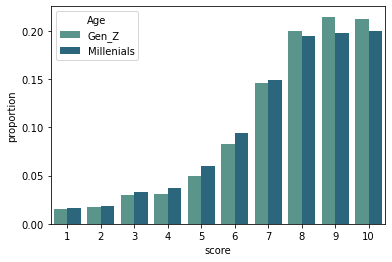

In [30]:
comedy_prop = df_reviews_comedy.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = comedy_prop, palette = "crest" )

,Age,score
0,Gen_Z,7.695085
1,Millenials,7.544193


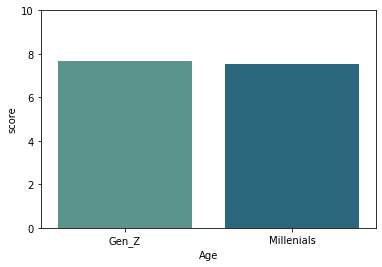

In [31]:
overall_comedy = df_reviews_comedy.groupby('Age', as_index=False)['score'].mean()
overall_comedy_plot = sns.barplot(x = 'Age', y = 'score', data = overall_comedy, palette = "crest")
plt.ylim(0, 10)
overall_comedy

<AxesSubplot:xlabel='score', ylabel='proportion'>

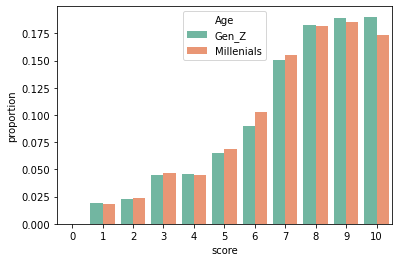

In [99]:
action_prop = df_reviews_action.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = action_prop, palette = "Set2" )

,Age,score
0,Gen_Z,7.370713
1,Millenials,7.284483


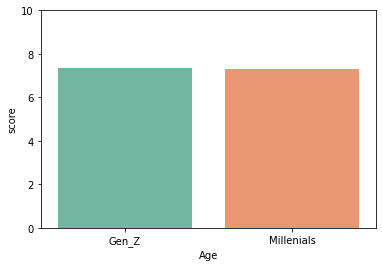

In [100]:
overall_action = df_reviews_action.groupby('Age', as_index=False)['score'].mean()
overall_action_plot = sns.barplot(x = 'Age', y = 'score', data = overall_action, palette = "Set2")
plt.ylim(0, 10)
overall_action

<AxesSubplot:xlabel='score', ylabel='proportion'>

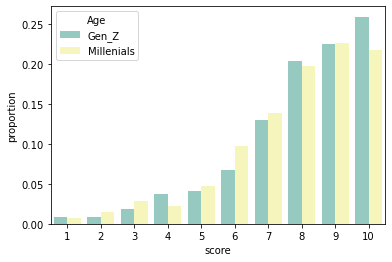

In [101]:
sports_prop = df_reviews_sports.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = sports_prop, palette = "Set3" )

,Age,score
0,Gen_Z,8.012987
1,Millenials,7.804348


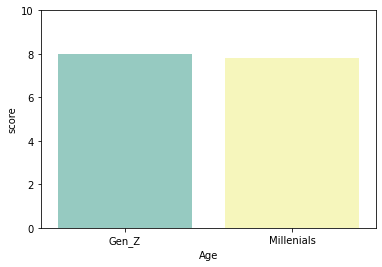

In [102]:
overall_sports = df_reviews_sports.groupby('Age', as_index=False)['score'].mean()
overall_sports_plot = sns.barplot(x = 'Age', y = 'score', data = overall_sports, palette = "Set3")
plt.ylim(0, 10)
overall_sports

<AxesSubplot:xlabel='score', ylabel='proportion'>

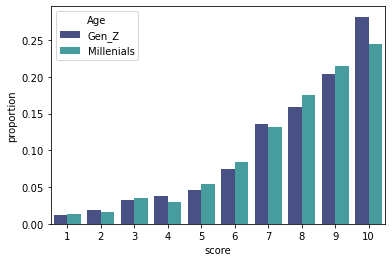

In [103]:
military_prop = df_reviews_military.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = military_prop, palette = "mako" )

,Age,score
0,Gen_Z,7.845609
1,Millenials,7.750107


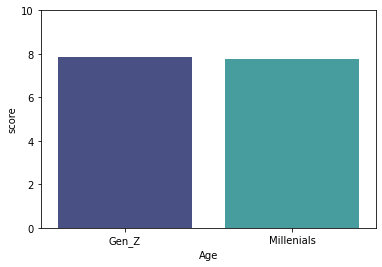

In [104]:
overall_military = df_reviews_military.groupby('Age', as_index=False)['score'].mean()
overall_military_plot = sns.barplot(x = 'Age', y = 'score', data = overall_military, palette = "mako")
plt.ylim(0, 10)
overall_military

<AxesSubplot:xlabel='score', ylabel='proportion'>

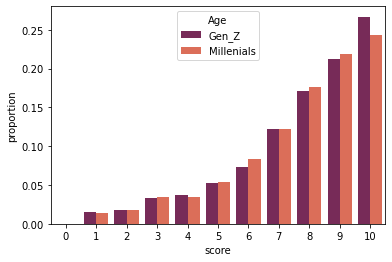

In [105]:
drama_prop = df_reviews_drama.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = drama_prop, palette = "rocket" )

,Age,score
0,Gen_Z,7.787674
1,Millenials,7.736092


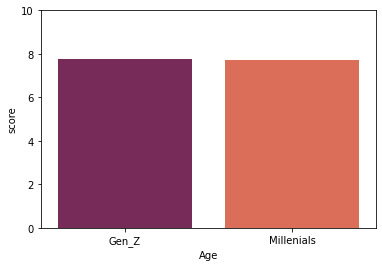

In [106]:
overall_drama = df_reviews_drama.groupby('Age', as_index=False)['score'].mean()
overall_drama_plot = sns.barplot(x = 'Age', y = 'score', data = overall_drama, palette = "rocket")
plt.ylim(0, 10)
overall_drama

<AxesSubplot:xlabel='score', ylabel='proportion'>

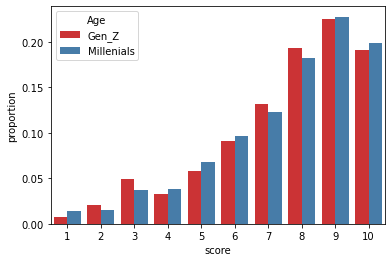

In [40]:
music_prop = df_reviews_music.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = music_prop, palette = "flare" )

,Age,score
0,Gen_Z,7.565359
1,Millenials,7.577594


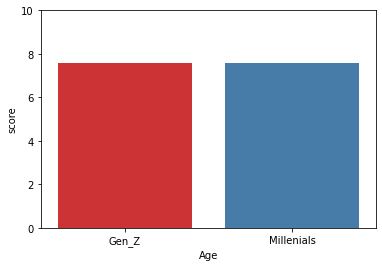

In [41]:
overall_music = df_reviews_music.groupby('Age', as_index=False)['score'].mean()
overall_music_plot = sns.barplot(x = 'Age', y = 'score', data = overall_music, palette = "flare")
plt.ylim(0, 10)
overall_music

<AxesSubplot:xlabel='score', ylabel='proportion'>

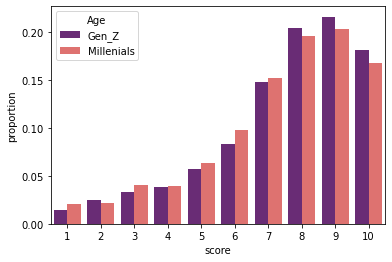

In [108]:
school_prop = df_reviews_school.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = school_prop, palette = "magma" )

,Age,score
0,Gen_Z,7.523183
1,Millenials,7.364632


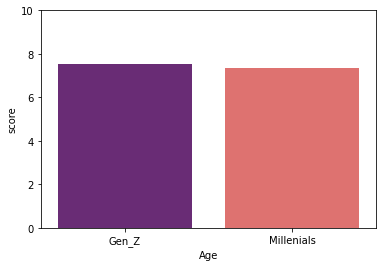

In [109]:
overall_school = df_reviews_school.groupby('Age', as_index=False)['score'].mean()
overall_school_plot = sns.barplot(x = 'Age', y = 'score', data = overall_school, palette = "magma")
plt.ylim(0, 10)
overall_school

<AxesSubplot:xlabel='score', ylabel='proportion'>

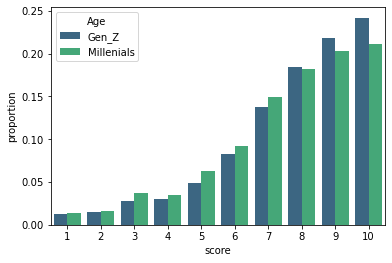

In [110]:
shounen_prop = df_reviews_shounen.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = shounen_prop, palette = "viridis" )

,Age,score
0,Gen_Z,7.817575
1,Millenials,7.594521


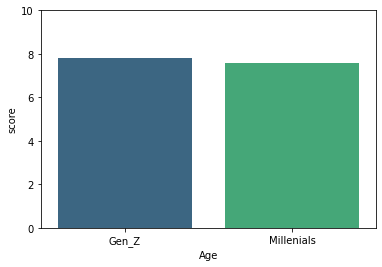

In [111]:
overall_shounen = df_reviews_shounen.groupby('Age', as_index=False)['score'].mean()
overall_shounen_plot = sns.barplot(x = 'Age', y = 'score', data = overall_shounen, palette = "viridis")
plt.ylim(0, 10)
overall_shounen

<AxesSubplot:xlabel='score', ylabel='proportion'>

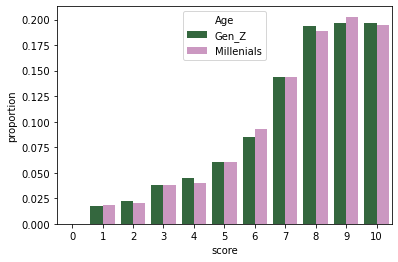

In [112]:
romance_prop = df_reviews_romance.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = romance_prop, palette = "cubehelix" )

,Age,score
0,Gen_Z,7.466918
1,Millenials,7.479257


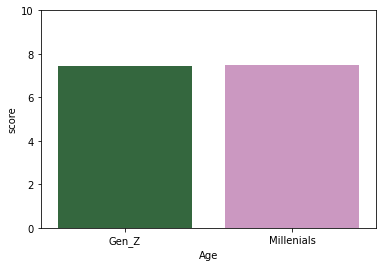

In [113]:
overall_romance = df_reviews_romance.groupby('Age', as_index=False)['score'].mean()
overall_romance_plot = sns.barplot(x = 'Age', y = 'score', data = overall_romance, palette = "cubehelix")
plt.ylim(0, 10)
overall_romance

<AxesSubplot:xlabel='score', ylabel='proportion'>

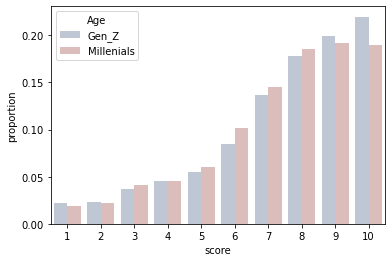

In [115]:
sci_fi_prop = df_reviews_sci_fi.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = sci_fi_prop, palette = "vlag" )

,Age,score
0,Gen_Z,7.508536
1,Millenials,7.395005


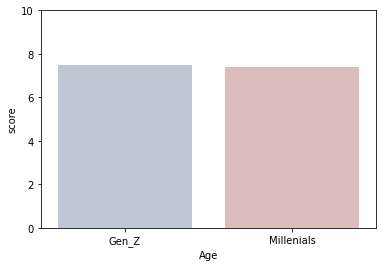

In [116]:
overall_sci_fi = df_reviews_sci_fi.groupby('Age', as_index=False)['score'].mean()
overall_sci_fi_plot = sns.barplot(x = 'Age', y = 'score', data = overall_sci_fi, palette = "vlag")
plt.ylim(0, 10)
overall_sci_fi

<AxesSubplot:xlabel='score', ylabel='proportion'>

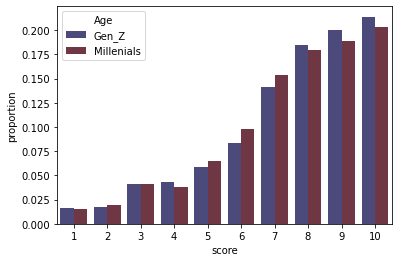

In [117]:
adventure_prop = df_reviews_adventure.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = adventure_prop, palette = "icefire" )

,Age,score
0,Gen_Z,7.542912
1,Millenials,7.472025


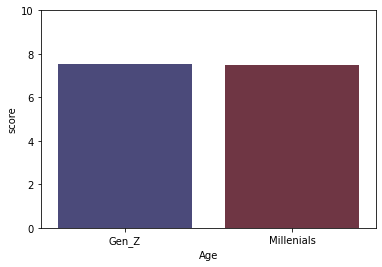

In [118]:
overall_adventure = df_reviews_adventure.groupby('Age', as_index=False)['score'].mean()
overall_adventure_plot = sns.barplot(x = 'Age', y = 'score', data = overall_adventure, palette = "icefire")
plt.ylim(0, 10)
overall_adventure

<AxesSubplot:xlabel='score', ylabel='proportion'>

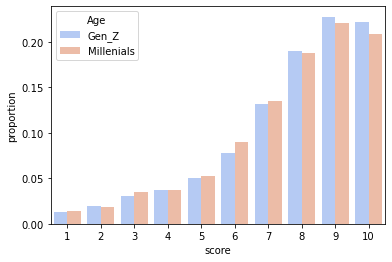

In [120]:
mystery_prop = df_reviews_mystery.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = mystery_prop, palette = "coolwarm" )

,Age,score
0,Gen_Z,7.720485
1,Millenials,7.631811


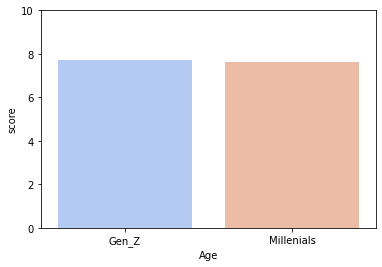

In [121]:
overall_mystery = df_reviews_mystery.groupby('Age', as_index=False)['score'].mean()
overall_mystery_plot = sns.barplot(x = 'Age', y = 'score', data = overall_mystery, palette = "coolwarm")
plt.ylim(0, 10)
overall_mystery

<AxesSubplot:xlabel='score', ylabel='proportion'>

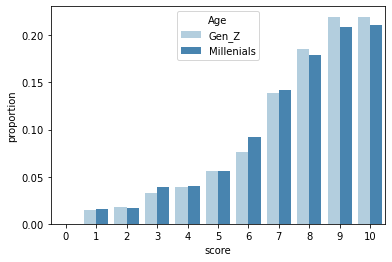

In [124]:
supernatural_prop = df_reviews_supernatural.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = supernatural_prop, palette = "Blues" )

,Age,score
0,Gen_Z,7.664955
1,Millenials,7.568932


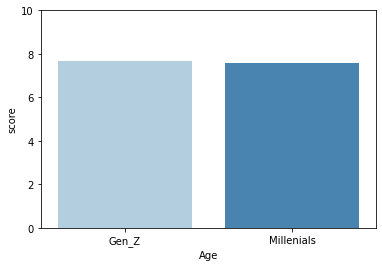

In [125]:
overall_supernatural = df_reviews_supernatural.groupby('Age', as_index=False)['score'].mean()
overall_supernatural_plot = sns.barplot(x = 'Age', y = 'score', data = overall_supernatural, palette = "Blues")
plt.ylim(0, 10)
overall_supernatural

<AxesSubplot:xlabel='score', ylabel='proportion'>

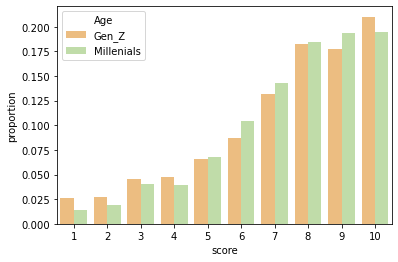

In [126]:
mecha_prop = df_reviews_mecha.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = mecha_prop, palette = "Spectral" )

,Age,score
0,Gen_Z,7.332608
1,Millenials,7.462341


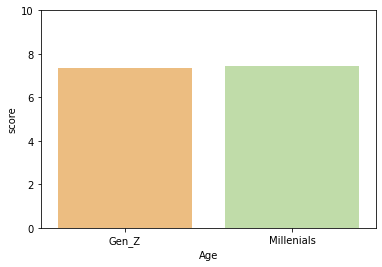

In [127]:
overall_mecha = df_reviews_mecha.groupby('Age', as_index=False)['score'].mean()
overall_mecha_plot = sns.barplot(x = 'Age', y = 'score', data = overall_mecha, palette = "Spectral")
plt.ylim(0, 10)
overall_mecha

<AxesSubplot:xlabel='score', ylabel='proportion'>

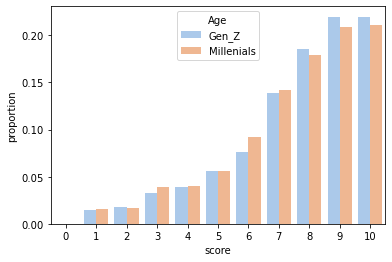

In [128]:
historical_prop = df_reviews_historical.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = historical_prop, palette = "pastel" )

,Age,score
0,Gen_Z,7.664955
1,Millenials,7.568932


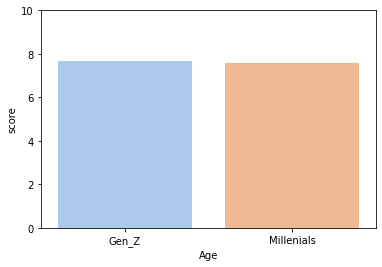

In [129]:
overall_historical = df_reviews_historical.groupby('Age', as_index=False)['score'].mean()
overall_historical_plot = sns.barplot(x = 'Age', y = 'score', data = overall_historical, palette = "pastel")
plt.ylim(0, 10)
overall_historical

<AxesSubplot:xlabel='score', ylabel='proportion'>

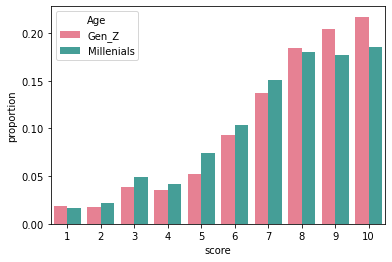

In [130]:
super_power_prop = df_reviews_super_power.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = super_power_prop, palette = "husl" )

,Age,score
0,Gen_Z,7.587236
1,Millenials,7.310658


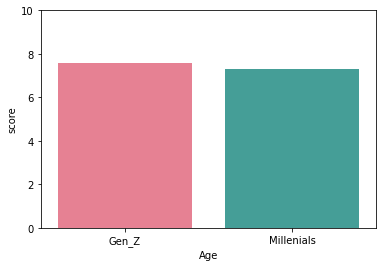

In [131]:
overall_super_power = df_reviews_super_power.groupby('Age', as_index=False)['score'].mean()
overall_super_power_plot = sns.barplot(x = 'Age', y = 'score', data = overall_super_power, palette = "husl")
plt.ylim(0, 10)
overall_super_power

<AxesSubplot:xlabel='score', ylabel='proportion'>

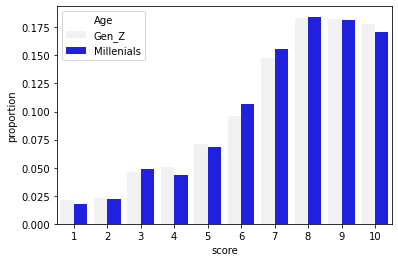

In [132]:
fantasy_prop = df_reviews_fantasy.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = fantasy_prop, palette = "light:b" )

,Age,score
0,Gen_Z,7.265102
1,Millenials,7.272283


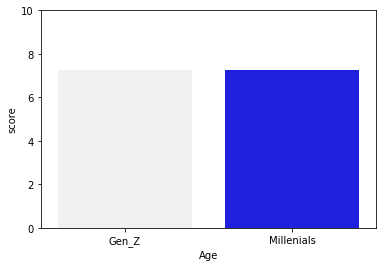

In [133]:
overall_fantasy = df_reviews_fantasy.groupby('Age', as_index=False)['score'].mean()
overall_fantasy_plot = sns.barplot(x = 'Age', y = 'score', data = overall_fantasy, palette = "light:b")
plt.ylim(0, 10)
overall_fantasy

<AxesSubplot:xlabel='score', ylabel='proportion'>

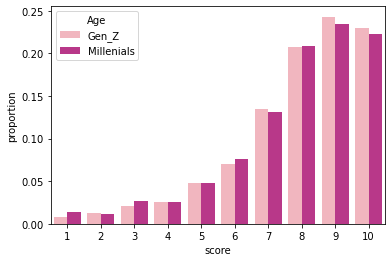

In [134]:
slice_of_life_prop = df_reviews_slice.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = slice_of_life_prop, palette = "RdPu" )

,Age,score
0,Gen_Z,7.942211
1,Millenials,7.853445


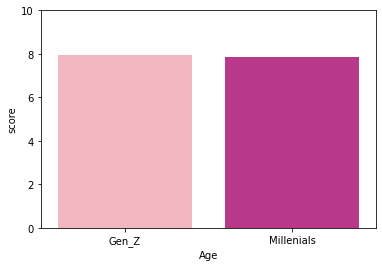

In [135]:
overall_slice_of_life = df_reviews_slice.groupby('Age', as_index=False)['score'].mean()
overall_slice_of_life_plot = sns.barplot(x = 'Age', y = 'score', data = overall_slice_of_life, palette = "RdPu") 
plt.ylim(0, 10)
overall_slice_of_life

<AxesSubplot:xlabel='score', ylabel='proportion'>

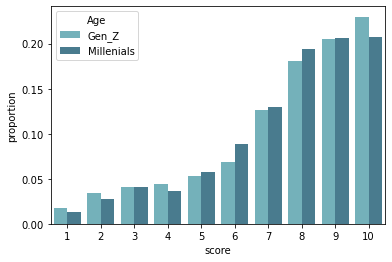

In [138]:
shoujo_prop = df_reviews_shoujo.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = shoujo_prop, palette = "GnBu_d" )

,Age,score
0,Gen_Z,7.533662
1,Millenials,7.540115


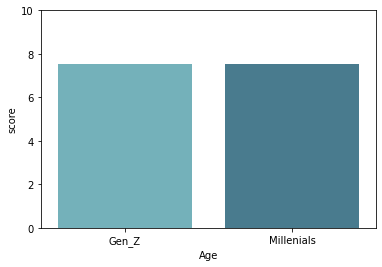

In [139]:
overall_shoujo = df_reviews_shoujo.groupby('Age', as_index=False)['score'].mean()
overall_shoujo_plot = sns.barplot(x = 'Age', y = 'score', data = overall_shoujo, palette = "GnBu_d")
plt.ylim(0, 10)
overall_shoujo

<AxesSubplot:xlabel='score', ylabel='proportion'>

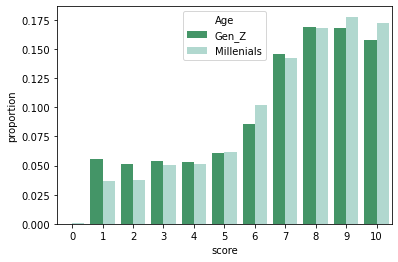

In [140]:
horror_prop = df_reviews_horror.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = horror_prop, palette = "BuGn_r" )

,Age,score
0,Gen_Z,6.806373
1,Millenials,7.046048


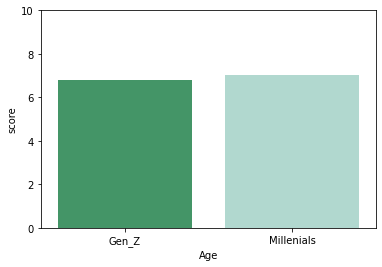

In [141]:
overall_horror = df_reviews_horror.groupby('Age', as_index=False)['score'].mean()
overall_horror_plot = sns.barplot(x = 'Age', y = 'score', data = overall_horror, palette = "BuGn_r")
plt.ylim(0, 10)
overall_horror

<AxesSubplot:xlabel='score', ylabel='proportion'>

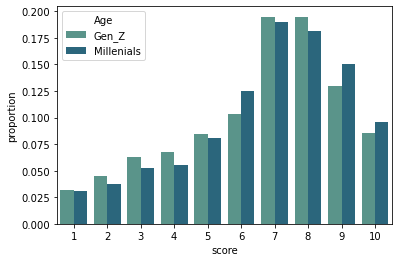

In [144]:
harem_prop = df_reviews_harem.groupby('Age')['score'].value_counts(normalize=True).rename("proportion").reset_index()
sns.barplot(x = 'score', y = 'proportion' , hue = 'Age', data = harem_prop, palette = "crest" )

,Age,score
0,Gen_Z,6.566519
1,Millenials,6.735337


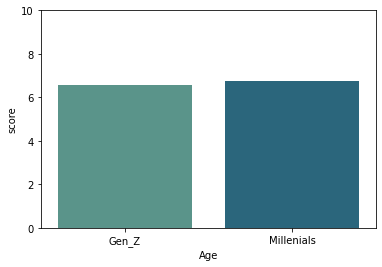

In [145]:
overall_harem = df_reviews_harem.groupby('Age', as_index=False)['score'].mean()
overall_harem_plot = sns.barplot(x = 'Age', y = 'score', data = overall_harem, palette = "crest")
plt.ylim(0, 10)
overall_harem

Below we made a new dataframe with genre, Gen Z scores, and Millenial scores as its columns. This was done by extracting the pre-existing means that we already calculated earlier on from `overall_df`.

In [72]:
overall_df = overall_comedy
overall_df['action'] = overall_action['score']
overall_df['sport'] = overall_sports['score']
overall_df['drama'] = overall_drama['score']
overall_df['military'] = overall_military['score']
overall_df['music'] = overall_music['score']
overall_df['school'] = overall_school['score']
overall_df['shounen'] = overall_shounen['score']
overall_df['romance'] = overall_romance['score']
overall_df['sci_fi'] = overall_sci_fi['score']
overall_df['adventure'] = overall_adventure['score']
overall_df['mystery'] = overall_mystery['score']
overall_df['supernatural'] = overall_supernatural['score']
overall_df['mecha'] = overall_mecha['score']
overall_df['historical'] = overall_historical['score']
overall_df['super_power'] = overall_super_power['score']
overall_df['fantasy'] = overall_fantasy['score']
overall_df['slice_of_life'] = overall_slice_of_life['score']
overall_df['shoujo'] = overall_shoujo['score']
overall_df['horror'] = overall_horror['score']
overall_df['harem'] = overall_harem['score']
overall_df = overall_df.rename(columns={'score': 'comedy'})
new_overall = pd.DataFrame(columns = ['genre','Gen_Z_score','Millenial_score'])
genres = ["comedy", "action", 'sport', 'drama','military','music','school','shounen','romance',
                           'sci_fi','adventure','mystery','supernatural','mecha','historical','super_power',
                           'fantasy','slice_of_life','shoujo','horror','harem']
count = 0
for genre in genres:
    new_overall.loc[count] = [genre,overall_df[genre][0],overall_df[genre][1]]
    count+=1
new_overall

,genre,Gen_Z_score,Millenial_score
0,comedy,7.695085,7.544193
1,action,7.370713,7.284483
2,sport,8.012987,7.804348
3,drama,7.787674,7.736092
4,military,7.845609,7.750107
5,music,7.565359,7.577594
6,school,7.523183,7.364632
7,shounen,7.817575,7.594521
8,romance,7.466918,7.479257
9,sci_fi,7.508536,7.395005


Down below is a graph where we get to see all the average ratings for each genre separated by the fact of them being a Gen Z or a Millenial for easier viewing.

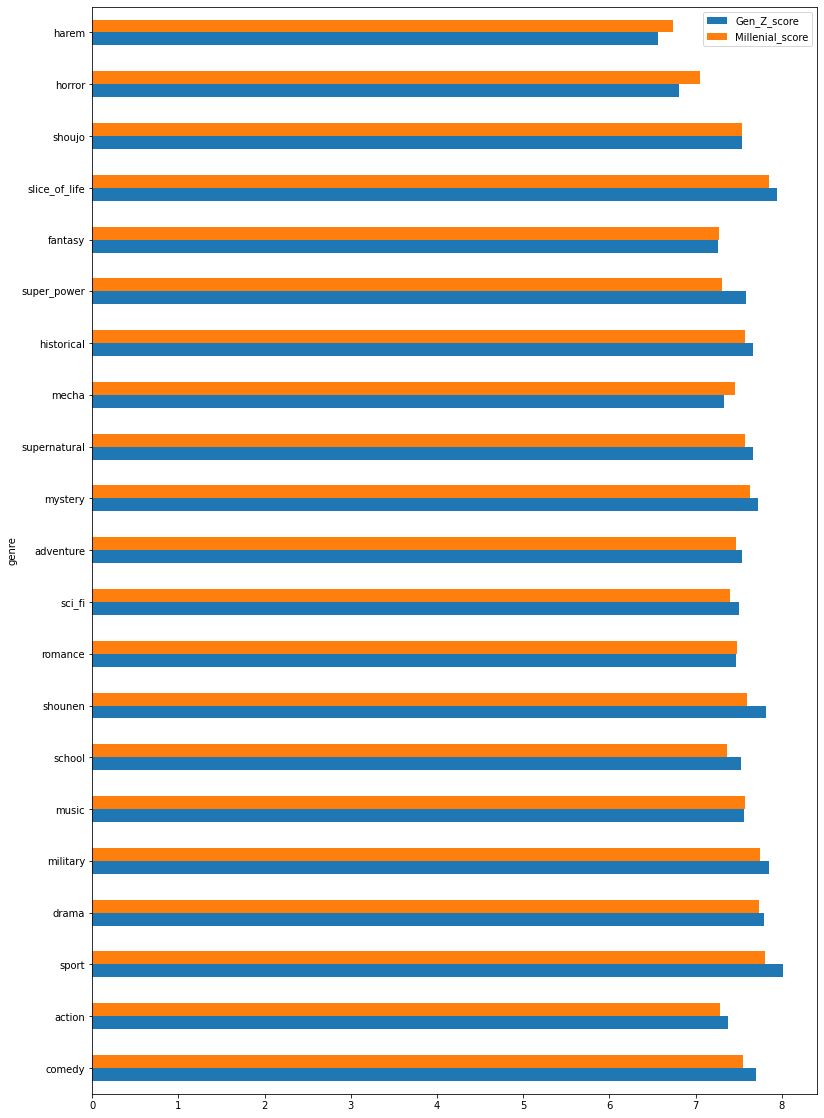

In [73]:
new_overall.plot(x='genre', y=['Gen_Z_score','Millenial_score'], kind = 'barh',figsize=(13, 20))
plt.show()

Overall, Gen-Z preferred 14/21, while Millenials preferred 7/21. Even though most of their scores were pretty even between the two age groups, there was still a difference. Gen-Z seem to prefer comedy, action, sports, drama, military, shounen, sci-fi, supernatural, slice of life, historical, super power, mystery, adventure, and school. And Millenial seemed to prefer fantasy, mecha, music, romance, shoujo, horror, and harem

# T-Test/Regression Model


In order to further analyze and fully understand whether or not there is a significant difference between Gen Z and Millennials anime preferences, we'll perform linear regressions on the anime reviews scores given by the group that did the review (Gen Z or Millennial) to see if there is a significant difference on preferences between the two age groups and the scores they give for the animes various genres. While we are here, we also wanted to see if other factors such as gender would have a bigger contribution to the difference in preferences, if there are any.

We began by running a regression model on the genre comedy to see whether the age gaps affect the preference for the genre. However, to save space, for the rest of the genre, we'll be printing only the P values of [Age, Male/Female, Nonbinary]. The True/False will indicate whether or not there is a significant difference between the predictors Age, Gender(Male, Non-Binary) and the dependent variable, 'score' in this case.

In [74]:
df_reviews_comedy
dependent1, predictors1 = patsy.dmatrices('score ~ Age + gender',df_reviews_comedy)
model1 = sm.OLS(dependent1, predictors1)
res_1 = model1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.70
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           3.67e-28
Time:                        00:29:29   Log-Likelihood:                -59022.
No. Observations:               27012   AIC:                         1.181e+05
Df Residuals:                   27008   BIC:                         1.181e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.9146 

In [75]:
dependent2, predictors2 = patsy.dmatrices('score ~ Age + gender',df_reviews_action)
model2 = sm.OLS(dependent2, predictors2)
res_2 = model2.fit()
for attributeIndex in range(1,4):
    print(round(res_2.pvalues[attributeIndex],5), round(res_2.pvalues[attributeIndex],5) < 0.01 )

0.00352 True
0.0 True
0.0 True


In [76]:
dependent3, predictors3 = patsy.dmatrices('score ~ Age + gender',df_reviews_sports)
model3 = sm.OLS(dependent3, predictors3)
res_3 = model3.fit()
for attributeIndex in range(1,4):
    print(round(res_3.pvalues[attributeIndex],5), round(res_3.pvalues[attributeIndex],5) < 0.01 )

0.06265 False
0.00047 True
0.0999 False


In [77]:
dependent4, predictors4 = patsy.dmatrices('score ~ Age + gender',df_reviews_drama)
model4 = sm.OLS(dependent4, predictors4)
res_4 = model4.fit()
for attributeIndex in range(1,4):
    print(round(res_4.pvalues[attributeIndex],5), round(res_4.pvalues[attributeIndex],5) < 0.01 )

0.08849 False
0.0 True
0.0 True


In [78]:
dependent5, predictors5 = patsy.dmatrices('score ~ Age + gender',df_reviews_military)
model5= sm.OLS(dependent5, predictors5)
res_5 = model5.fit()
for attributeIndex in range(1,4):
    print(round(res_5.pvalues[attributeIndex],5), round(res_5.pvalues[attributeIndex],5) < 0.01 )

0.17229 False
0.0 True
0.05435 False


In [79]:
dependent6, predictors6 = patsy.dmatrices('score ~ Age + gender',df_reviews_music)
model6= sm.OLS(dependent6, predictors6)
res_6 = model6.fit()
for attributeIndex in range(1,4):
    print(round(res_6.pvalues[attributeIndex],5), round(res_6.pvalues[attributeIndex],5) < 0.01 )

0.88547 False
0.06055 False
0.37256 False


In [80]:
dependent7, predictors7 = patsy.dmatrices('score ~ Age + gender',df_reviews_school)
model7 = sm.OLS(dependent7, predictors7)
res_7 = model7.fit()
for attributeIndex in range(1,4):
    print(round(res_7.pvalues[attributeIndex],5), round(res_7.pvalues[attributeIndex],5) < 0.01 )

1e-05 True
0.00093 True
0.00051 True


In [81]:
dependent8, predictors8 = patsy.dmatrices('score ~ Age + gender',df_reviews_shounen)
model8 = sm.OLS(dependent8, predictors8)
res_8 = model8.fit()
for attributeIndex in range(1,4):
    print(round(res_8.pvalues[attributeIndex],5), round(res_8.pvalues[attributeIndex],5) < 0.01 )

0.0 True
0.0 True
0.0 True


In [82]:
dependent9, predictors9 = patsy.dmatrices('score ~ Age + gender',df_reviews_romance)
model9 = sm.OLS(dependent9, predictors9)
res_9 = model9.fit()
for attributeIndex in range(1,4):
    print(round(res_9.pvalues[attributeIndex],5), round(res_9.pvalues[attributeIndex],5) < 0.01 )

0.82593 False
0.0 True
0.0 True


In [83]:
dependent10, predictors10 = patsy.dmatrices('score ~ Age + gender',df_reviews_sci_fi)
model10 = sm.OLS(dependent10, predictors10)
res_10 = model10.fit()
for attributeIndex in range(1,4):
    print(round(res_10.pvalues[attributeIndex],5), round(res_10.pvalues[attributeIndex],5) < 0.01 )

0.0035 True
0.00037 True
0.00017 True


In [84]:
dependent11, predictors11 = patsy.dmatrices('score ~ Age + gender',df_reviews_adventure)
model11 = sm.OLS(dependent11, predictors11)
res_11 = model11.fit()
for attributeIndex in range(1,4):
    print(round(res_11.pvalues[attributeIndex],5), round(res_11.pvalues[attributeIndex],5) < 0.01 )

0.07349 False
0.0 True
0.00095 True


In [85]:
dependent12, predictors12 = patsy.dmatrices('score ~ Age + gender',df_reviews_mystery)
model12 = sm.OLS(dependent12, predictors12)
res_12 = model12.fit()
for attributeIndex in range(1,4):
    print(round(res_12.pvalues[attributeIndex],5), round(res_12.pvalues[attributeIndex],5) < 0.01 )

0.07804 False
0.00043 True
0.07385 False


In [86]:
dependent13, predictors13 = patsy.dmatrices('score ~ Age + gender',df_reviews_supernatural)
model13 = sm.OLS(dependent13, predictors13)
res_13 = model13.fit()
for attributeIndex in range(1,4):
    print(round(res_13.pvalues[attributeIndex],5), round(res_13.pvalues[attributeIndex],5) < 0.01 )

0.00936 True
0.0 True
0.0 True


In [87]:
dependent14, predictors14 = patsy.dmatrices('score ~ Age + gender',df_reviews_mecha)
model14 = sm.OLS(dependent14, predictors14)
res_14 = model14.fit()
for attributeIndex in range(1,4):
    print(round(res_14.pvalues[attributeIndex],5), round(res_14.pvalues[attributeIndex],5) < 0.01 )

0.08745 False
0.053 False
0.00047 True


In [88]:
dependent15, predictors15 = patsy.dmatrices('score ~ Age + gender',df_reviews_historical)
model15 = sm.OLS(dependent15, predictors15)
res_15 = model15.fit()
for attributeIndex in range(1,4):
    print(round(res_15.pvalues[attributeIndex],5), round(res_15.pvalues[attributeIndex],5) < 0.01 )

0.00936 True
0.0 True
0.0 True


In [89]:
dependent16, predictors16 = patsy.dmatrices('score ~ Age + gender',df_reviews_super_power)
model16 = sm.OLS(dependent16, predictors16)
res_16 = model16.fit()
for attributeIndex in range(1,4):
    print(round(res_16.pvalues[attributeIndex],5), round(res_16.pvalues[attributeIndex],5) < 0.01 )

1e-05 True
0.0 True
0.01201 False


In [90]:
dependent17, predictors17 = patsy.dmatrices('score ~ Age + gender',df_reviews_fantasy)
model17 = sm.OLS(dependent17, predictors17)
res_17 = model17.fit()
for attributeIndex in range(1,4):
    print(round(res_17.pvalues[attributeIndex],5), round(res_17.pvalues[attributeIndex],5) < 0.01 )


0.78933 False
0.0 True
6e-05 True


In [91]:
dependent18, predictors18 = patsy.dmatrices('score ~ Age + gender',df_reviews_slice)
model18 = sm.OLS(dependent18, predictors18)
res_18 = model18.fit()
for attributeIndex in range(1,4):
    print(round(res_18.pvalues[attributeIndex],5), round(res_18.pvalues[attributeIndex],5) < 0.01 )


0.02518 False
0.20328 False
0.37987 False


In [92]:
dependent19, predictors19 = patsy.dmatrices('score ~ Age + gender',df_reviews_shoujo)
model19 = sm.OLS(dependent19, predictors19)
res_19 = model19.fit()
for attributeIndex in range(1,4):
    print(round(res_19.pvalues[attributeIndex],5), round(res_19.pvalues[attributeIndex],5) < 0.01 )

0.68554 False
0.0 True
0.00988 True


In [93]:
dependent20, predictors20 = patsy.dmatrices('score ~ Age + gender',df_reviews_horror)
model20 = sm.OLS(dependent20, predictors20)
res_20 = model20.fit()
for attributeIndex in range(1,4):
    print(round(res_20.pvalues[attributeIndex],5), round(res_20.pvalues[attributeIndex],5) < 0.01 )

0.00094 True
0.00025 True
0.02037 False


In [94]:
dependent21, predictors21 = patsy.dmatrices('score ~ Age + gender',df_reviews_harem)
model21 = sm.OLS(dependent21, predictors21)
res_21 = model21.fit()
for attributeIndex in range(1,4):
    print(round(res_21.pvalues[attributeIndex],5), round(res_21.pvalues[attributeIndex],5) < 0.01 )

0.03671 False
0.10637 False
0.03856 False


After running the regression model on each genre with age and gender as the 2 predictors and looking at their p-values, we can see that age isn't a clear predictor for score as more than half(12/21) of these genres indicated no significant difference with an alpha of 0.01. On the otherhand, with gender as the predictor for score, we found that 18/21 genres resulted in a significant difference, showing that gender, in this case, proves to be the better or more consistent predictor for score/ratings of an anime. At the same time, this denies our initial prediction that scores were more dictated/impacted by age groups only.

# Ethics & Privacy

All of our data comes from public datasets. These datasets are listed on public websites anyone can access, such as Kaggle. There is also data pulled directly off MyAnimeList, which gathers reported information about reviews and ratings, where users know that said reviews and ratings will be posted online for all to see - this is information willingly shared with the public. Although there is some data that uses personal bias, such as a user’s personal rating for a show, the reviews are averaged out and cannot be traced back to the user. Another way we prevent tracing back is by removing the MyAnimeList username, so that no individual person’s privacy is violated. We also do not intend on using personal information, such as gender, age, and profile name, in order to avoid a possible data breach or privacy exposure.

We note that this project is aimed to look at and analyze the possible effects age has on show genre preference. We are not advocating or preferring a certain genre or age over another. We understand that this project could potentially imply to show producers to produce more content of a certain genre matched with a certain age group, however this project is simply trying to look for correlations within art, at the most basic level. The benefits of this project outweigh the potential risk of this project being used for selfish or power-hungry purposes.

# Conclusion & Discussion

Our research question gathered information regarding anime genres, as well as ratings given to specific shows from users who have watched those animes. We looked at the popularities of the shows, and how different age generations (specifically Millenials and Gen Z-ers) rated them. More specifically, we wanted to look at trends between the two age groups, if one group preferred a certain genre over another. Does being a Millenial or Gen Z-er mean you enjoy specific genres of anime over the other? 

In order to answer our question, we looked at data. The dataset contained several thousand unique anime titles, along with the corresponding genres they responded to. It also included user profiles and information about the profiles: their username (which we ignored for ethical reasons), gender (which we also ignored for initial EDA), and year of birth (which we used to determine if they were classified as a Millennial or Gen Z). It also included the rating.

With our EDA, we were able to look at different trends between the genres and age groups. For example, Gen-Z preferred 14 out of the 21 genres (over Millennials), and Millennials preferred the other 7. We also noticed that the scores seemed pretty even between the two age groups.

We performed linear regressions (t-test) on our data. We found that overall, age was not a very good predictor for the score given to the anime. Because we did not get statistically significant results from doing tests on age, we decided to look at gender as well (and compare it to age), and found out that gender determined the score way more than age. Thus, we did not support our initial hypothesis that age strongly dictates the ratings of an anime.

### Limitations
Despite finding evidence, we did also find some limitations in the analysis. For example, some animes had more reviews and ratings than others. That means that the animes with more reviews could suffer from the law of large numbers, which states that as the sample size grows, the mean averages out. In that case, reviews from animes with less popularity will carry more weight. 

We had a few other limitations as well. One of them being that we did not have enough variables. In addition, the age groups were broad, over 30 years fit into only two groups. We could have added a third or fourth group, to make the ages more significant, independent, and individual. There are also always going to be outliers, such as people older or younger than the age range we set, and outliers in those who do not have these accounts to send reviews in the first place.

# Team Contributions

#### Claire Wu:
- Did the writeups for the background, hypothesis, and conclusion
- Researched specific datasets and prior works
- Curated a presentation to provide a concise overview of our project
- Helped with the editing of the overall writeup


#### Felicity Villagomez:
- Writeup for the overview 
- Produced a video explaining the details of the project
- Helped with the editing of the overall writeup

#### Duy Pham:
- Organized the overall average scores between the genres and the age group
- Plotted the bar graph to compare the preferences between Gen-Z and Millenials 
- Wrote T-test finding significant differences between age groups and gender
- Helped adding details for clarity in the write up 

#### Hy Huynh:
- Cleaned up the dataset that matches our need for the hypothesis
- Provided tables for each genre based on user, age, and score
- Plotted graphs to compare both the average scores of Gen-Z and Millenials for every genre
- Helped adding details for clarity in the write up 

#### Andrew Vo:
- Proofread bugs and minor errors within the coding
- Splitting the workload to provide data for each genre
- Helped with the editing of the overall writeup